## Step 3 - Climate Analysis and Exploration

In [1]:
# Dependencies
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
from pprint import pprint
from citipy import citipy
from random import uniform

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, select, func
from sqlalchemy.ext.automap import automap_base

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

In [2]:
# Create Database Connection
Base = automap_base()
# engine, suppose it has two tables 'user' and 'address' set up
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

# reflect the tables
Base.prepare(engine, reflect=True)

# mapped classes are now created with names by default
# matching that of the table name.
Station = Base.classes.stations
Measurement = Base.classes.measurements

session = Session(engine)

### Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [3]:
# Find the dates
Latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date = pd.to_datetime(Latest_date[0]).date()- timedelta(days=365)
print(start_date)

2016-08-23


In [4]:
# Query and select 'date' and 'prcp' for the last 12 months
date_precipitation=(session.query(Measurement.date,Measurement.prcp)
.filter(Measurement.date>=start_date)
.order_by(Measurement.date.desc()).all())

In [5]:
# Load the query results into a DataFrame and set the date column as an index
df_date_precipitation=pd.DataFrame(date_precipitation, columns=['date','precipitation'])
df_date_precipitation.set_index('date', inplace=True)
df_date_precipitation.head()

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


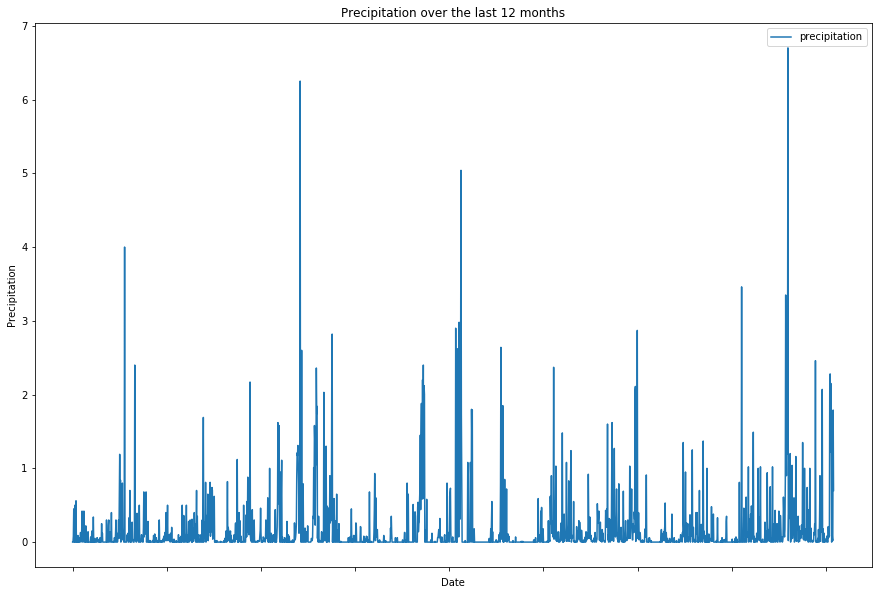

In [6]:
# Plot the results using the DataFrame plot method
df_date_precipitation.plot(figsize=(15,10))
plt.title("Precipitation over the last 12 months")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.savefig("precip.png")
plt.show()

In [7]:
#print the summary statistics for the precipitation data
df_date_precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

* List the stations and observation counts in descending order

* Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

* Filter by the station with the highest number of observations.

* Plot the results as a histogram with `bins=12`.

In [8]:
# Calculate the total number of stations 
station_count = session.query(func.count(Station.station)).all()
station_count[0]

(9)

In [9]:
# Find and list the most active stations
(session.query(Measurement.station, Station.name, func.count(Measurement.station))
 .filter(Measurement.station==Station.station)
 .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [10]:
# Find the station has the highest number of observations
(session.query(Measurement.station, Station.name, func.count(Measurement.station))
 .filter(Measurement.station==Station.station)
 .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).limit(1).all())

[('USC00519281', 'WAIHEE 837.5, HI US', 2772)]

In [31]:
date_tobs=(session.query(Measurement.date,Measurement.tobs)
.filter(Measurement.station=='USC00519281')
.filter(Measurement.date>=start_date)
.order_by(Measurement.date.desc()).all())

In [38]:
# Stations with the highest number of observations
tobs_df=pd.DataFrame(date_tobs, columns=['date','tobs'])
tobs_df.head()

,date,tobs
0,2017-08-18,79
1,2017-08-17,76
2,2017-08-16,76
3,2017-08-15,77
4,2017-08-14,77


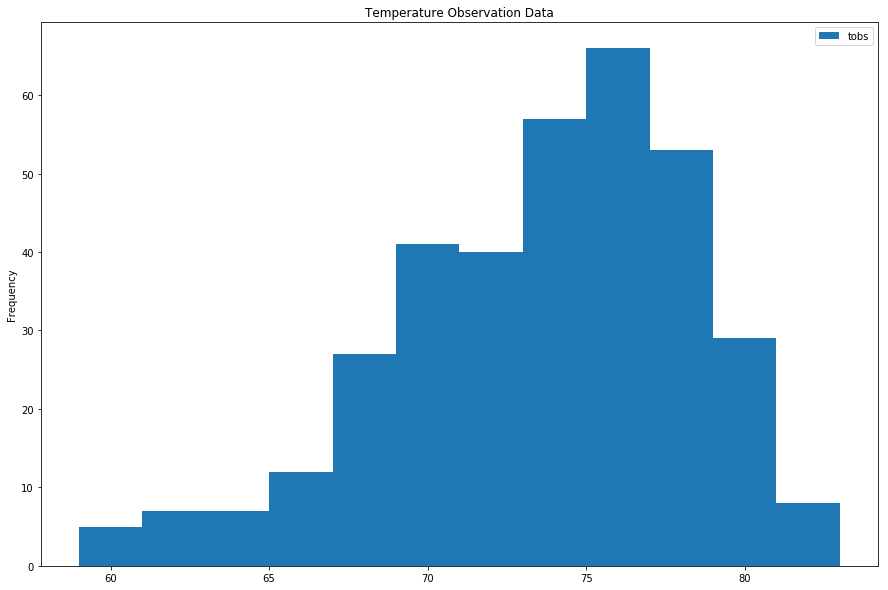

In [33]:
# Plot the results as a histogram with bins=12.
tobs_df.plot(kind='hist',bins=12, figsize=(15,10))
plt.title("Temperature Observation Data")
plt.savefig("tobs.png")
plt.show()

##### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

* Use the average temperature as the bar height.

* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [34]:
#Write a function called calc_temps
def calc_temps(start_date, end_date):
    temp=(session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
              .filter(Measurement.date>=start_date)
              .filter(Measurement.date<=end_date).all())
   
    return temp

In [40]:
# Use the calc_temps function to calculate the min, avg, and max temperatures
match_calc_temp=calc_temps('2017-05-05', '2017-05-18')
print(match_calc_temp)
type(match_calc_temp)

[(66, 74.96103896103897, 80)]


list

In [41]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
x=1
y=round(match_calc_temp[0][1],2)
yerr=match_calc_temp[0][2]-match_calc_temp[0][0]

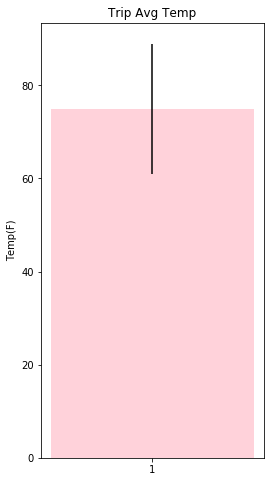

In [43]:
# Create the plot
fig = plt.figure(figsize=(4, 8))
plt.bar(x, y, yerr=yerr, align='center', color='pink', alpha=0.7, tick_label=1)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.savefig("bar.png")
plt.show()